In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn import datasets
import json
import os
import gzip
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
import numpy as np
import networkx as nx
import re
from networkx.algorithms.community import kernighan_lin_bisection
import matplotlib.pyplot as plt
from setuptools import setup, find_packages
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
data = []
with open("Appliances_5.json", 'r') as f: 
    for idx, line in enumerate(f): 
        d = json.loads(line)
        d = {'overall': d['overall'],  'reviewText': d['reviewText']}
        data.append(d)
        
data = pd.DataFrame(data)
print(data)

      overall                                         reviewText
0         5.0  I like this as a vent as well as something tha...
1         5.0                                          good item
2         5.0                     Fit my new LG dryer perfectly.
3         5.0                     Good value for electric dryers
4         5.0                  Price and delivery was excellent.
...       ...                                                ...
2272      5.0  Works great. I used it and an extension kit wi...
2273      5.0  Anyone who thinks they don't have a problem wi...
2274      5.0                                               good
2275      5.0                                     washer washing
2276      5.0                        Great product fast shipping

[2277 rows x 2 columns]


In [3]:
data1= data.loc[data['overall'] != 5.0]
data2 = data1.loc[data1['overall'] != 4.0]
data3 = data2.loc[data1['overall'] != 3.0]
data4 = data.loc[data['overall'] == 5.0]
data5 = pd.concat([data3,data4], axis=0)
data3 = data3.reset_index(drop=True)
data4 = data4.reset_index(drop=True)
data5 = data5.reset_index(drop=True)
print(data3)
print(data4)
print(data5)

    overall                                         reviewText
0       2.0  works great. we loved ours! till we didn't.  t...
1       2.0  Luved it for the few months it worked!  great ...
2       1.0  Be careful, NewAir will not stand by their pro...
3       1.0  We would give less than 1 star if possible DON...
4       1.0  Be careful, NewAir will not stand by their pro...
5       1.0  We would give less than 1 star if possible DON...
6       1.0  We would give less than 1 star if possible DON...
7       2.0                                              cheap
8       2.0  i cook only once in a blue moon.  i was shocke...
9       1.0  see original remarks, made the mistake of buyi...
10      2.0  i cook only once in a blue moon.  i was shocke...
11      2.0  i cook only once in a blue moon.  i was shocke...
12      1.0  see original remarks, made the mistake of buyi...
13      2.0  i cook only once in a blue moon.  i was shocke...
14      2.0                                            

In [4]:
lancaster_stemmer = LancasterStemmer()

nltk.download('popular')
nltk.download('abc')
def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review).get_text()
    # Remove punctuation and numbers
    letters_only = re.sub("[^a-zA-Z?!]", " ", review_text)
    # Convert to lowercase
    words = letters_only.lower().split()
    # list to set
    stops = set(stopwords.words("english"))
    # Delete the stop word and return to the prototype
    meaningful_words = [lancaster_stemmer.stem(w) for w in words if not w in stops]
    return( " ".join(meaningful_words))

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\k\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\k\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\k\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\k\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\k\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\k\Ap

In [5]:
num_reviews = data5["reviewText"].size
print(num_reviews)
clean_data5_Reviews = []
data5["reviewText"] = data5["reviewText"].apply(lambda s:review_to_words(s))

1634


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = data5["reviewText"]
vector = TfidfVectorizer()
tf_data = vector.fit_transform(corpus)
print(tf_data)    # (sentence，characteristic word)  Weights
print(vector.vocabulary_)    #   characteristic word
df1 = pd.DataFrame(tf_data.toarray(), columns=vector.get_feature_names()) # to DataFrame
df1

  (0, 475)	0.1325195544401013
  (0, 805)	0.43112610369165355
  (0, 94)	0.38824454267180797
  (0, 391)	0.16125841505355518
  (0, 746)	0.525694425885076
  (0, 502)	0.525694425885076
  (0, 426)	0.2082169591848798
  (0, 300)	0.1285668761454833
  (0, 835)	0.0850749464844924
  (1, 232)	0.04456234090281536
  (1, 830)	0.06938548900165868
  (1, 10)	0.1746330618069878
  (1, 439)	0.06938548900165868
  (1, 846)	0.044129310747415676
  (1, 494)	0.028673342934956377
  (1, 16)	0.0443809050103791
  (1, 479)	0.05303348856325614
  (1, 96)	0.149737164939693
  (1, 285)	0.15892549973156506
  (1, 778)	0.06863540372513763
  (1, 813)	0.1746330618069878
  (1, 317)	0.1746330618069878
  (1, 306)	0.1746330618069878
  (1, 50)	0.0444895921343639
  (1, 781)	0.1746330618069878
  :	:
  (1630, 484)	0.08862145531429927
  (1630, 770)	0.0547224353875733
  (1630, 289)	0.08871112603835117
  (1630, 422)	0.11279809246122242
  (1630, 273)	0.08871112603835117
  (1630, 433)	0.14687071918780206
  (1630, 777)	0.11454385746900514
  

,abl,absolv,accompany,accord,acquir,act,ad,adam,adapt,addit,...,wrench,writ,wrot,year,years,yet,you,youtub,youv,zero
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.044129,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.035622,0.008199,0.000000,0.0,0.000000,0.035622,...,0.0,0.0,0.106866,0.019003,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.049861,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.035622,0.008199,0.000000,0.0,0.000000,0.035622,...,0.0,0.0,0.106866,0.019003,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1629,0.0,0.0,0.0,0.0,0.000000,0.064714,0.000000,0.0,0.118102,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1630,0.0,0.0,0.0,0.0,0.000000,0.000000,0.073977,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.073079,0.0,0.0,0.0,0.0,0.0,0.0
1631,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1632,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def creat_array_0(n, m):
    matrixA = np.zeros((n,m))
    return matrixA

In [8]:
M = creat_array_0(20,20)
print(M)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [9]:
from random import sample
def createList(n):
    lst = []
    for i in range(n+1):
        lst.append(i)
    return(lst)
print(sample(createList(21), 10)) 
print(sample(createList(1611),10))

[13, 12, 9, 8, 2, 7, 3, 1, 4, 21]
[1377, 1605, 430, 1021, 691, 587, 1504, 1503, 561, 497]


In [10]:
data3 = data3.drop(['overall'], axis=1)
data4 = data4.drop(['overall'], axis=1)

In [11]:
m1 = [9, 2, 8, 18, 21, 3, 12, 0, 5, 13]
m2 = [1460, 674, 1299, 91, 1478, 557, 86, 737, 481, 164]
data6 = pd.concat([data3.loc[9],data3.loc[2],data3.loc[8],data3.loc[18],data3.loc[21],data3.loc[3],data3.loc[12],data3.loc[0],data3.loc[5],data3.loc[13]], axis=0)
data6 = data6.reset_index(drop=True)
data6 = pd.DataFrame(data6)
names=['reviewText']
data6.columns=names
data7 = pd.concat([data4.loc[1460],data4.loc[674],data4.loc[1299],data4.loc[91],data4.loc[1478],data4.loc[557],data4.loc[86],data4.loc[737],data4.loc[481],data4.loc[164]], axis=0)
data7 = data7.reset_index(drop=True)
data7 = pd.DataFrame(data7)
data7.columns=names
data8 = pd.concat([data6,data7], axis=0)
data8 = data8.reset_index(drop=True)
print(data8)

                                           reviewText
0   see original remarks, made the mistake of buyi...
1   Be careful, NewAir will not stand by their pro...
2   i cook only once in a blue moon.  i was shocke...
3                                             ok part
4   piece of garbage switch set to high that it wi...
5   We would give less than 1 star if possible DON...
6   see original remarks, made the mistake of buyi...
7   works great. we loved ours! till we didn't.  t...
8   We would give less than 1 star if possible DON...
9   i cook only once in a blue moon.  i was shocke...
10  So, this is what life comes down to when you a...
11  I bought this last October and finally got aro...
12  So, this is what life comes down to when you a...
13  Works great. I used it and an extension kit wi...
14  Anyone who thinks they don't have a problem wi...
15  So, this is what life comes down to when you a...
16  I bought this last October and finally got aro...
17  I bought this last Octob

In [12]:
num_reviews = data8["reviewText"].size
print(num_reviews)

clean_data8_Reviews = []
data8["reviewText"] = data8["reviewText"].apply(lambda s:review_to_words(s))

20


In [13]:
corpus1 = data8["reviewText"]
vector1 = TfidfVectorizer()
tf_data1 = vector1.fit_transform(corpus1)
print(tf_data1)    #   (sentence，characteristic word)  Weights
print(vector1.vocabulary_)    #   characteristic word
df2 = pd.DataFrame(tf_data1.toarray(), columns=vector1.get_feature_names()) # to DataFrame
df2

  (0, 321)	0.3419143666310211
  (0, 437)	0.2614648731869555
  (0, 300)	0.2614648731869555
  (0, 114)	0.3085248100537464
  (0, 384)	0.22807531660968075
  (0, 108)	0.2614648731869555
  (0, 65)	0.24357351554463907
  (0, 318)	0.3419143666310211
  (0, 302)	0.282625857894645
  (0, 411)	0.3419143666310211
  (0, 350)	0.3419143666310211
  (0, 444)	0.20217636445057938
  (1, 326)	0.017932504014677376
  (1, 308)	0.03450098273374536
  (1, 196)	0.03450098273374536
  (1, 405)	0.030326891914140796
  (1, 26)	0.020229671959264443
  (1, 70)	0.03450098273374536
  (1, 164)	0.03450098273374536
  (1, 339)	0.03450098273374536
  (1, 144)	0.03450098273374536
  (1, 357)	0.030326891914140796
  (1, 1)	0.03450098273374536
  (1, 539)	0.019017145707295763
  (1, 275)	0.030326891914140796
  :	:
  (19, 204)	0.06513464737202954
  (19, 398)	0.0771491899852499
  (19, 9)	0.03857459499262495
  (19, 218)	0.05084854010286965
  (19, 405)	0.061515413037209456
  (19, 26)	0.08206819411000385
  (19, 539)	0.11572378497787486
  (19, 

,absolv,acquir,act,ad,adam,adapt,addit,ago,ai,air,...,wow,wrap,wrench,writ,wrot,year,years,you,youtub,youv
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.034501,0.017933,0.000000,0.000000,0.000000,0.034501,0.000000,0.034501,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.103503,0.038034,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.129345,0.000000,0.000000,0.000000,0.000000,0.081109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129345,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.087280,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.087280,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.129345,0.000000,0.000000,0.000000,0.000000,0.081109,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.129345,0.000000,0.000000,0.000000


In [14]:
def WeightText(x,y):
    for x in range(20):
        for y in range(20):
            for n in range(595):
                M[x,y] = M[x,y] + tf_data1[x,n]*tf_data1[y,n]
    print(M[x,y])
    return

In [15]:
for x in range(20):
    for y in range(20):
        for n in range(595):
            M[x,y] = M[x,y] + tf_data1[x,n]*tf_data1[y,n]

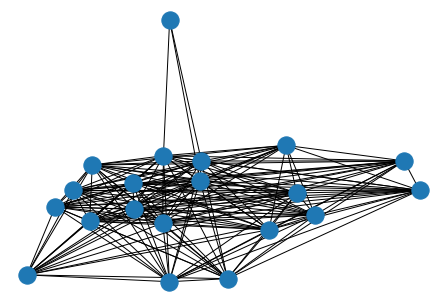

In [16]:
G_complete = nx.from_numpy_matrix(M)
weights = nx.get_edge_attributes(G_complete,'weight').values()
nx.draw(G_complete)

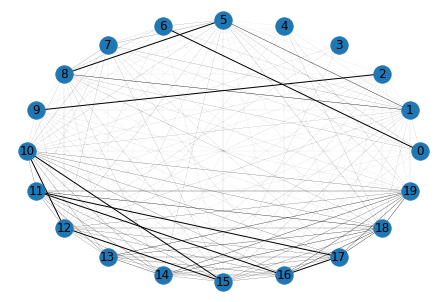

In [17]:
G = nx.Graph()
for i in range(20):
    for j in range(20):
        G.add_edge(i,j,weight=M[i][j])
        
weights = nx.get_edge_attributes(G,'weight').values()

pos = nx.circular_layout(G)
nx.draw(G, pos, 
        width=list(weights),
        with_labels=True)

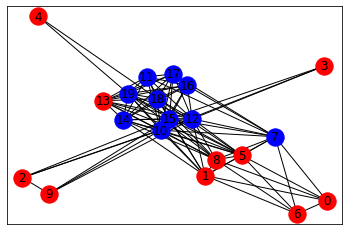

In [121]:
threshold = 0.2
long_edges = list(filter(lambda e: e[2] < threshold, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G.remove_edges_from(le_ids)
for i in range(20):
    G.nodes[i]['name'] = i
pos = nx.spring_layout(G)
A, B = kernighan_lin_bisection(G)
nx.draw_networkx_nodes(G, pos, nodelist=A, node_color="red")
nx.draw_networkx_nodes(G, pos, nodelist=B, node_color="blue")
node_labels = nx.get_node_attributes(G, 'name')
nx.draw_networkx_labels(G,pos,labels=node_labels)
nx.draw_networkx_edges(G, pos)
plt.show()

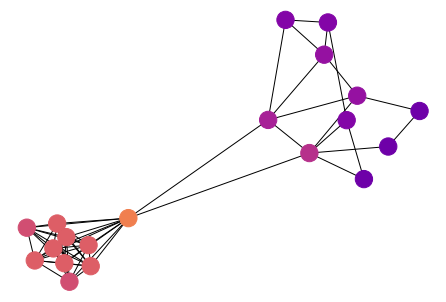

In [276]:
from matplotlib import cm
color_map = cm.get_cmap('plasma')
deg = nx.degree_centrality(G)

nx.draw(G, node_color = [color_map(deg[i]) for i in range(G.number_of_nodes())])

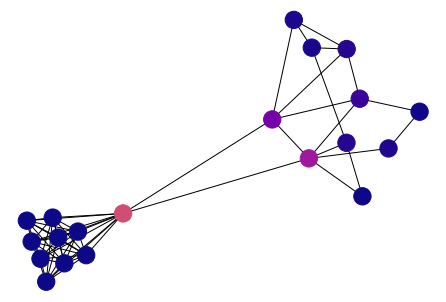

In [277]:
cb = nx.betweenness_centrality(G)
nx.draw(G, node_color = [color_map(cb[i]) for i in range(G.number_of_nodes())])

In [20]:
from random import sample
def createList(n):
    lst = []
    for i in range(n+1):
        lst.append(i)
    return(lst)
print(sample(createList(21), 20)) 
print(sample(createList(1611),20))

[3, 11, 19, 8, 6, 4, 14, 7, 12, 1, 18, 10, 15, 9, 17, 5, 2, 16, 20, 21]
[184, 79, 1436, 672, 914, 565, 753, 167, 1578, 715, 612, 541, 899, 442, 472, 269, 388, 214, 637, 1041]


In [24]:
data9 = pd.concat([data3.loc[3],data3.loc[11],data3.loc[19],data3.loc[8],data3.loc[6],data3.loc[4],data3.loc[14],data3.loc[7],data3.loc[12],data3.loc[1],data3.loc[18],data3.loc[10],data3.loc[15],data3.loc[9],data3.loc[17],data3.loc[5],data3.loc[2],data3.loc[16],data3.loc[20],data3.loc[21]],axis=0)
data9 = data9.reset_index(drop=True)
data9 = pd.DataFrame(data9)
names=['reviewText']
data9.columns=names
data10 = pd.concat([data4.loc[184],data4.loc[79],data4.loc[1436],data4.loc[672],data4.loc[914],data4.loc[565],data4.loc[753],data4.loc[167],data4.loc[1578],data4.loc[715],data4.loc[612],data4.loc[541],data4.loc[899],data4.loc[442],data4.loc[472],data4.loc[269],data4.loc[388],data4.loc[214],data4.loc[637],data4.loc[1041]], axis=0)
data10 = data10.reset_index(drop=True)
data10 = pd.DataFrame(data10)
data10.columns=names
data11 = pd.concat([data9,data10], axis=0)
data11 = data11.reset_index(drop=True)
print(data11)

                                           reviewText
0   We would give less than 1 star if possible DON...
1   i cook only once in a blue moon.  i was shocke...
2   I got a warehouse deal "LIKE NEW" and when I i...
3   i cook only once in a blue moon.  i was shocke...
4   We would give less than 1 star if possible DON...
5   Be careful, NewAir will not stand by their pro...
6                                               cheap
7                                               cheap
8   see original remarks, made the mistake of buyi...
9   Luved it for the few months it worked!  great ...
10                                            ok part
11  i cook only once in a blue moon.  i was shocke...
12     it will last 6 mouths and u get to do it agian
13  see original remarks, made the mistake of buyi...
14                                              cheap
15  We would give less than 1 star if possible DON...
16  Be careful, NewAir will not stand by their pro...
17                          

In [25]:
num_reviews = data11["reviewText"].size
print(num_reviews)
clean_data11_Reviews = []
data11["reviewText"] = data11["reviewText"].apply(lambda s:review_to_words(s))

40


In [26]:
corpus2 = data11["reviewText"]
vector2 = TfidfVectorizer()
tf_data2 = vector2.fit_transform(corpus2)
print(tf_data2)    #   (sentence，characteristic word)  Weights
print(vector2.vocabulary_)    #   characteristic word
df3 = pd.DataFrame(tf_data2.toarray(), columns=vector2.get_feature_names()) # to DataFrame
df3

  (0, 20)	0.11598815616565711
  (0, 298)	0.146509370912153
  (0, 415)	0.10196574507189796
  (0, 219)	0.08546694141916122
  (0, 359)	0.146509370912153
  (0, 548)	0.12865560480899532
  (0, 383)	0.25731120961799064
  (0, 350)	0.10616251964866961
  (0, 445)	0.11598815616565711
  (0, 87)	0.146509370912153
  (0, 116)	0.146509370912153
  (0, 590)	0.11598815616565711
  (0, 164)	0.09813439006249942
  (0, 381)	0.23197631233131422
  (0, 17)	0.11598815616565711
  (0, 60)	0.11598815616565711
  (0, 506)	0.12865560480899532
  (0, 123)	0.11080183870583767
  (0, 32)	0.12865560480899532
  (0, 646)	0.2437358359187848
  (0, 676)	0.08028062395934178
  (0, 395)	0.06761317531600355
  (0, 257)	0.293018741824306
  (0, 551)	0.12865560480899532
  (0, 11)	0.08279746925902094
  :	:
  (39, 439)	0.07859011374787135
  (39, 37)	0.05394397699484661
  (39, 616)	0.023792828243813104
  (39, 490)	0.02528868655494198
  (39, 143)	0.13468091722147113
  (39, 572)	0.04174707448442556
  (39, 289)	0.03542606013938508
  (39, 230)	

,absolv,acquir,act,ad,adam,adapt,addit,adv,ag,ago,...,wrench,writ,wrot,year,years,yet,you,youtub,youv,zero
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.080281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.130013,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.130013,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.082738,0.000000,0.068473,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.130013,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.130013,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.080281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.034468,0.020486,0.000000,0.000000,0.000000,0.034468,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.103403,0.034767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167261,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.075850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
M1 = creat_array_0(40,40)
print(M1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [65]:
for x in range(40):
    for y in range(40):
        for n in range(683):
            M1[x,y] = M1[x,y] + tf_data2[x,n]*tf_data2[y,n]

In [ ]:
G1 = nx.from_numpy_matrix(M1)
weights = nx.get_edge_attributes(G1,'weight').values()
nx.draw(G1)

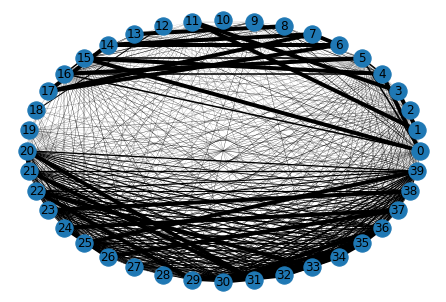

In [86]:
G1 = nx.Graph()
for i in range(40):
    for j in range(40):
        G1.add_edge(i,j,weight=M1[i][j])
        
weights = nx.get_edge_attributes(G1,'weight').values()

pos = nx.circular_layout(G1)
nx.draw(G1, pos, 
        width=list(weights),
        with_labels=True)

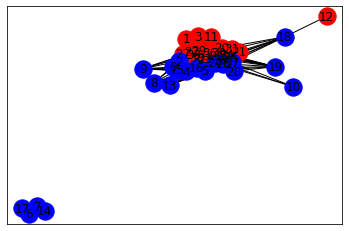

In [107]:
threshold = 0.1
long_edges = list(filter(lambda e: e[2] < threshold, (e for e in G1.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G1.remove_edges_from(le_ids)
for i in range(40):
    G1.nodes[i]['name'] = i
pos = nx.spring_layout(G1)
A, B = kernighan_lin_bisection(G1)
nx.draw_networkx_nodes(G1, pos, nodelist=A, node_color="red")
nx.draw_networkx_nodes(G1, pos, nodelist=B, node_color="blue")
node_labels = nx.get_node_attributes(G1, 'name')
nx.draw_networkx_labels(G1,pos,labels=node_labels)
nx.draw_networkx_edges(G1, pos)
plt.show()

In [68]:
from random import sample
def createList(n):
    lst = []
    for i in range(n+1):
        lst.append(i)
    return(lst)
print(sample(createList(21), 20)) 
print(sample(createList(1611),40))

[13, 0, 9, 4, 12, 19, 21, 11, 6, 18, 10, 20, 16, 14, 15, 5, 8, 1, 17, 2]
[480, 1378, 1571, 34, 722, 1257, 357, 345, 121, 645, 641, 987, 69, 590, 1153, 827, 388, 1448, 1388, 1069, 680, 485, 231, 79, 1, 1331, 303, 184, 577, 1283, 444, 764, 630, 1150, 1138, 1459, 169, 663, 702, 1515]


In [89]:
data12 = pd.concat([data3.loc[3],data3.loc[11],data3.loc[19],data3.loc[8],data3.loc[6],data3.loc[4],data3.loc[14],data3.loc[7],data3.loc[12],data3.loc[1],data3.loc[18],data3.loc[10],data3.loc[15],data3.loc[9],data3.loc[17],data3.loc[5],data3.loc[2],data3.loc[16],data3.loc[20],data3.loc[21]],axis=0)
data12 = data12.reset_index(drop=True)
data12 = pd.DataFrame(data12)
names=['reviewText']
data12.columns=names
data13 = pd.concat([data4.loc[480],data4.loc[1378],data4.loc[1571],data4.loc[34],data4.loc[722],data4.loc[1257],data4.loc[357],data4.loc[345],data4.loc[121],data4.loc[645],data4.loc[641],data4.loc[987],data4.loc[69],data4.loc[590],data4.loc[1153],data4.loc[827],data4.loc[388],data4.loc[1448],data4.loc[1388],data4.loc[1069],data4.loc[680],data4.loc[485],data4.loc[231],data4.loc[79],data4.loc[1],data4.loc[1331],data4.loc[303],data4.loc[184],data4.loc[577],data4.loc[1283],data4.loc[444],data4.loc[764],data4.loc[630],data4.loc[1150],data4.loc[1138],data4.loc[1459],data4.loc[169],data4.loc[663],data4.loc[702],data4.loc[1515]], axis=0)
data13 = data13.reset_index(drop=True)
data13 = pd.DataFrame(data13)
data13.columns=names
data14 = pd.concat([data12,data13], axis=0)
data14 = data14.reset_index(drop=True)
print(data14)

                                           reviewText
0   We would give less than 1 star if possible DON...
1   i cook only once in a blue moon.  i was shocke...
2   I got a warehouse deal "LIKE NEW" and when I i...
3   i cook only once in a blue moon.  i was shocke...
4   We would give less than 1 star if possible DON...
5   Be careful, NewAir will not stand by their pro...
6                                               cheap
7                                               cheap
8   see original remarks, made the mistake of buyi...
9   Luved it for the few months it worked!  great ...
10                                            ok part
11  i cook only once in a blue moon.  i was shocke...
12     it will last 6 mouths and u get to do it agian
13  see original remarks, made the mistake of buyi...
14                                              cheap
15  We would give less than 1 star if possible DON...
16  Be careful, NewAir will not stand by their pro...
17                          

In [90]:
num_reviews = data14["reviewText"].size
print(num_reviews)
clean_data14_Reviews = []
data14["reviewText"] = data14["reviewText"].apply(lambda s:review_to_words(s))

60


In [91]:
corpus3 = data14["reviewText"]
vector3 = TfidfVectorizer()
tf_data3 = vector3.fit_transform(corpus3)
print(tf_data3)    #   (sentence，characteristic word)  Weights
print(vector3.vocabulary_)    #   characteristic word
df4 = pd.DataFrame(tf_data3.toarray(), columns=vector3.get_feature_names()) # to DataFrame
df4

  (0, 20)	0.10210052678101603
  (0, 302)	0.14936873748494892
  (0, 422)	0.09377345798206109
  (0, 223)	0.09134219742934645
  (0, 364)	0.14936873748494892
  (0, 556)	0.13310816062179848
  (0, 389)	0.26621632124359695
  (0, 355)	0.08904994400720413
  (0, 452)	0.11684758375864802
  (0, 87)	0.14936873748494892
  (0, 116)	0.14936873748494892
  (0, 598)	0.11684758375864802
  (0, 165)	0.09636167966280701
  (0, 387)	0.23369516751729605
  (0, 17)	0.11684758375864802
  (0, 60)	0.09134219742934645
  (0, 514)	0.13310816062179848
  (0, 123)	0.11684758375864802
  (0, 32)	0.13310816062179848
  (0, 654)	0.25385235242007315
  (0, 684)	0.07921967134002696
  (0, 401)	0.06125230425576021
  (0, 261)	0.29873747496989783
  (0, 559)	0.13310816062179848
  (0, 11)	0.075875775566966
  :	:
  (58, 334)	0.06212054598728488
  (58, 2)	0.05293034889552879
  (58, 115)	0.06541563247350375
  (58, 227)	0.05917299068451627
  (58, 595)	0.057808041906288854
  (58, 664)	0.056506602577586024
  (58, 95)	0.05917299068451627
  (5

,absolv,acquir,act,ad,adam,adapt,addit,adv,ag,ago,...,wrench,writ,wrot,year,years,yet,you,youtub,youv,zero
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.079220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.133132,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.133132,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.084209,0.000000,0.066743,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.133132,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.133132,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.079220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.034663,0.016346,0.000000,0.000000,0.000000,0.034663,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.10399,0.034132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167882,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.075068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [93]:
M2 = creat_array_0(60,60)
print(M2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [94]:
for x in range(60):
    for y in range(60):
        for n in range(691):
            M2[x,y] = M2[x,y] + tf_data3[x,n]*tf_data3[y,n]

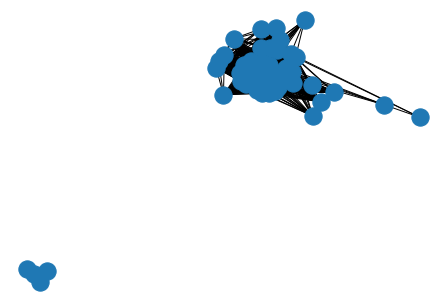

In [100]:
G2 = nx.from_numpy_matrix(M2)
weights = nx.get_edge_attributes(G2,'weight').values()
nx.draw(G2)

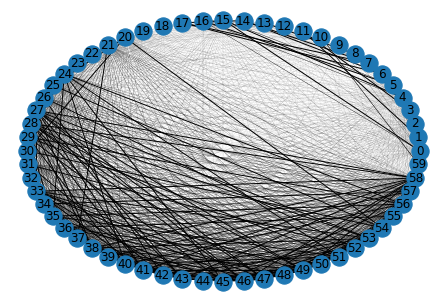

In [105]:
G2 = nx.Graph()
for i in range(60):
    for j in range(60):
        G2.add_edge(i,j,weight=M2[i][j])
        
weights = nx.get_edge_attributes(G2,'weight').values()

pos = nx.circular_layout(G2)
nx.draw(G2, pos, 
        width=list(weights),
        with_labels=True)

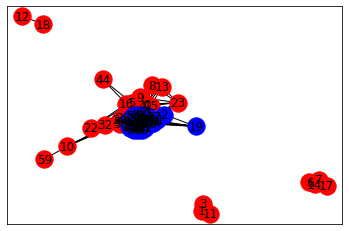

In [106]:
threshold = 0.05
long_edges = list(filter(lambda e: e[2] < threshold, (e for e in G2.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G2.remove_edges_from(le_ids)
for i in range(60):
    G2.nodes[i]['name'] = i
pos = nx.spring_layout(G2)
A, B = kernighan_lin_bisection(G2)
nx.draw_networkx_nodes(G2, pos, nodelist=A, node_color="red")
nx.draw_networkx_nodes(G2, pos, nodelist=B, node_color="blue")
node_labels = nx.get_node_attributes(G2, 'name')
nx.draw_networkx_labels(G2,pos,labels=node_labels)
nx.draw_networkx_edges(G2, pos)
plt.show()

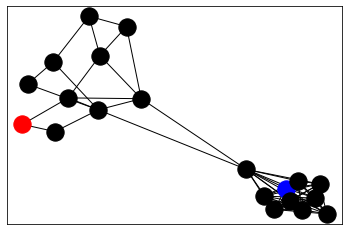

In [274]:
from networkx.algorithms import node_classification

G.nodes[0]["label"] = "+" # the known labels must be saved in the attribute "label"
G.nodes[19]["label"] = "-"

# colour nodes of the graph based on their label (black = unlabelled)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, nodelist=[0], node_color="red") 
nx.draw_networkx_nodes(G, pos, nodelist=[19],node_color="blue")
unlabelled = [i for i in range(G.number_of_nodes()) if i not in [0,19]]
nx.draw_networkx_nodes(G,pos, nodelist=unlabelled, node_color="black")
nx.draw_networkx_edges(G,pos)

plt.show()

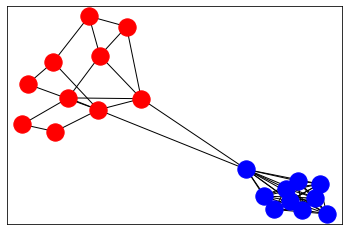

In [275]:
labels = node_classification.harmonic_function(G)
threshold = 0.4
long_edges = list(filter(lambda e: e[2] < threshold, (e for e in G.edges.data('weight'))))
le_ids = list(e[:2] for e in long_edges)

# remove filtered edges from graph G
G.remove_edges_from(le_ids)
# colour nodes based on computed label
plus = [i for i in range(G.number_of_nodes()) if labels[i] == '+']
minus = [i for i in range(G.number_of_nodes()) if labels[i] == '-']

nx.draw_networkx_nodes(G, pos, nodelist=plus, node_color="red")
nx.draw_networkx_nodes(G, pos, nodelist=minus, node_color="blue")
nx.draw_networkx_edges(G, pos)

plt.show()